In [1]:
import pandas as pd
import csv
import numpy as np
import seaborn as sn
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [51]:
#Fonctions d'affichage
def niceDisplay14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
        display from 1 up to 4 images or vectors with optionnal titles
        2D arrays are displayed as image with imshow()
        1D arrays are displayed as curve with plot()
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('niceDisplay_14 : affichage should be a list of length 1 up to 4')
        
    if nb_affichages != len(titres):
        raise ValueError('niceDisplay_14 : titres must have same length than affichage')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
            # on affiche une image
        s.imshow(affichages[i])

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

    

def imshow(I, title=None, size=500, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.gray()
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()
    
# This function diplays multiple images at once
def imshowV2(images,titles = None):
    plt.figure(figsize=(20,len(images)))
    cpt=1
    for i in range(len(images)):
        plt.subplot(int(np.ceil(len(images)/5)),5,cpt)
        plt.imshow(images[i])
        plt.axis('off')
        cpt += 1
    plt.show()

In [3]:
#Fonctions pour calculer les entropies

# Entropie d'une image en niveaux de gris
def entropy_bw(I):
    p, _ = np.histogram(I, bins = 256)
    p = p/p.sum() #normalisation de l'histogramme
    ent_I = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie
    return ent_I

# Entropie d'une image en couleur
def entropy_color(I, k):
    I = I/k #Réduire la dynamique de l'image en la divisant par k
    I = I.astype(int) # Ne garder que la partie entière des valeurs
    p_values = int(256/k)
    H_3d = np.zeros((p_values,p_values,p_values)) # Initialiser l'histogramme 3D par la nouvelle dynamique
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            x = I[i,j] # x est un pixel qui a trois valeurs R G B
            H_3d[x[0],x[1],x[2]] += 1 #on va incrémenter le nombre des valeurs R G B sur l'histogramme3D
            
    p = H_3d/H_3d.sum() # On normalise l'histogramme
    entropy = -(np.sum(p[p>0]*np.log2(p[p>0]))) #calcul de l'entropie

    return entropy

In [76]:
# Charger les données du dataset Ava après les avoir nettoyer avec la librairie Panda
data = pd.read_csv("Ava_EssentialsV1.csv")

In [77]:
data


,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
0,953417,22,0,6.112903,11.094118,6.689572,2.299058,15.379713
1,953777,20,53,6.593750,11.235859,7.698757,2.023211,15.576208
2,953756,0,0,5.796875,9.316750,7.766329,1.663045,12.915759
3,954195,0,0,5.040984,12.796335,7.210267,2.460309,17.739487
4,953903,21,28,5.943548,5.568864,7.566631,1.020280,7.720084
...,...,...,...,...,...,...,...,...
249731,56938,9,0,5.339844,7.322678,5.114791,1.984712,10.151388
249732,57304,1,18,6.235294,1.932998,1.662843,1.611520,2.679705
249733,56711,9,24,7.072581,7.433306,7.579280,1.359595,10.304750
249734,57303,22,0,5.608871,12.011088,7.541434,2.207923,16.650904


In [78]:
#Trier les notes par ordre ascendant
data2 = data.sort_values(by=["B"]).copy()
data2

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
131977,7143,0,0,1.808989,2.879844,3.969770,1.005678,3.992311
52460,221721,0,0,1.880519,11.116596,7.226441,2.132568,15.410874
110382,309716,0,0,1.935484,10.013520,7.585779,1.829962,13.881687
170278,8791,0,0,1.988764,3.424876,4.427804,1.072289,4.747886
7332,212523,0,0,2.000000,9.967788,6.642144,2.080396,13.818288
...,...,...,...,...,...,...,...,...
161842,55938,13,18,8.388060,7.718247,6.726054,1.590793,10.699762
236683,491369,0,0,8.399254,11.186753,7.684606,2.018078,15.508133
160323,150,0,0,8.517442,10.623916,7.235449,2.035516,14.727875
75162,9482,28,29,8.571429,13.293221,7.340880,2.510369,18.428317


1.808988764044944

In [82]:
lowest_rated_image = np.array(Image.open('images/7143.jpg'))#Charger l'image avec la note la plus basse
lri_b = data2["B"][131977] #Récupérer sa note
lri_bw_entropy = data2["Entropy_BW"][131977] #Récupérer son entropie Black & White
lri_color_entropy = data2["Entropy_Color_NonR"][131977] #Récupérer son entropie Couleur
r1 = data2["E/E_bw"][131977] #Récupérer le rapport E/E_bw de cette image

#Ici on fait la même chose avec l'image qui a la note la plus haute
highest_rated_image = np.array(Image.open('images/106.jpg')) 
hri_b = data2["B"][218110]
hri_bw_entropy = data2["Entropy_BW"][218110]
hri_color_entropy = data2["Entropy_Color_NonR"][218110]
r2 = data2["E/E_bw"][218110]

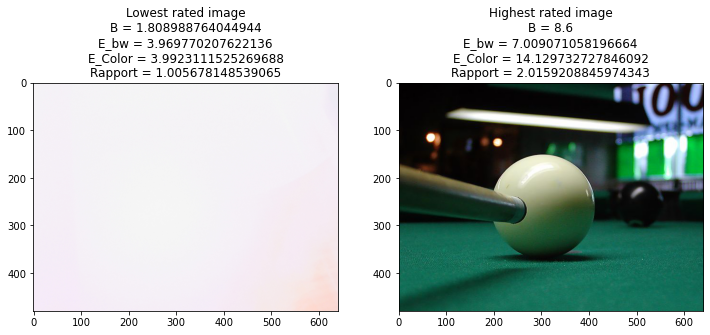

In [83]:
#Afficher les deux images avec leurs données
title1 = 'Lowest rated image\n'+'B = ' + str(lri_b)+ '\n' + 'E_bw = '+str(lri_bw_entropy)+'\n'+'E_Color = '+str(lri_color_entropy) + '\n' + 'Rapport = ' + str(r1)
title2 = 'Highest rated image\n'+'B = ' + str(hri_b)+ '\n' +'E_bw = '+str(hri_bw_entropy)+'\n'+'E_Color = '+str(hri_color_entropy) + '\n' + 'Rapport = ' + str(r2)
niceDisplay14([lowest_rated_image, highest_rated_image],
              [title1, title2])

In [84]:
#Trier les entropies BW par ordre ascendant
data3 = data.sort_values(by=["Entropy_BW"]).copy()
data3

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
172298,695641,12,0,3.690789,0.003392,0.003843,1.223604,0.004702
161568,903287,5,21,3.169118,0.011115,0.013992,1.101271,0.015409
248936,372500,0,0,3.995413,0.009121,0.016306,0.775435,0.012644
143153,169385,19,0,4.167131,0.055364,0.064025,1.198768,0.076751
87849,778385,0,0,5.938931,0.069869,0.087580,1.105953,0.096860
...,...,...,...,...,...,...,...,...
68146,445701,8,0,5.219917,13.081510,7.988464,2.270126,18.134823
114027,880030,2,19,5.158228,12.722016,7.988944,2.207608,17.636459
158106,844364,16,17,4.275701,11.770995,7.989225,2.042509,16.318064
106066,20587,1,21,5.644351,5.993761,7.989646,1.039986,8.309117


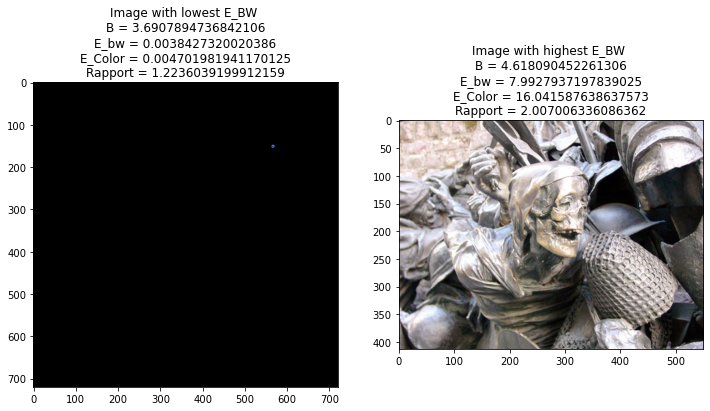

In [85]:
image_with_lowestEbw = np.array(Image.open('images/695641.jpg'))#Charger l'image qui la plus basse Entropie BW
ilbw_b = data3["B"][172298] #Récupérer sa note
ilbw_bw_entropy = data3["Entropy_BW"][172298] #Récupérer son entropie Black & White
ilbw_color_entropy = data3["Entropy_Color_NonR"][172298] #Récupérer son entropie Couleur
r1 = data3["E/E_bw"][172298] #Récupérer le rapport E/E_bw de cette image

#Ici on fait la même chose avec l'image qui l'entropie BW la plus haute
image_with_highestEbw = np.array(Image.open('images/86983.jpg')) 
ihbw_b = data3["B"][123427]
ihbw_bw_entropy = data3["Entropy_BW"][123427]
ihbw_color_entropy = data3["Entropy_Color_NonR"][123427]
r2 = data3["E/E_bw"][123427]

#Afficher les deux images avec leurs données
title1 = 'Image with lowest E_BW \n'+'B = ' + str(ilbw_b)+ '\n' + 'E_bw = '+str(ilbw_bw_entropy)+'\n'+'E_Color = '+str(ilbw_color_entropy) + '\n' + 'Rapport = ' + str(r1)
title2 = 'Image with highest E_BW \n'+'B = ' + str(ihbw_b)+ '\n' +'E_bw = '+str(ihbw_bw_entropy)+'\n'+'E_Color = '+str(ihbw_color_entropy) + '\n' + 'Rapport = ' + str(r2)
niceDisplay14([image_with_lowestEbw, image_with_highestEbw],
              [title1, title2])

In [86]:
#Trier les entropies couleur par ordre ascendant
data4 = data.sort_values(by=["Entropy_Color_NonR"]).copy()
data4

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
172298,695641,12,0,3.690789,0.003392,0.003843,1.223604,0.004702
248936,372500,0,0,3.995413,0.009121,0.016306,0.775435,0.012644
161568,903287,5,21,3.169118,0.011115,0.013992,1.101271,0.015409
143153,169385,19,0,4.167131,0.055364,0.064025,1.198768,0.076751
155998,260183,1,41,4.295652,0.058141,0.097154,0.829621,0.080601
...,...,...,...,...,...,...,...,...
59079,828296,0,0,5.481203,15.814384,7.511514,2.918638,21.923392
28691,348463,1,28,5.924188,15.830482,7.673700,2.859860,21.945708
4875,311640,1,22,6.198980,15.903677,7.379060,2.987803,22.047178
5121,401041,1,22,5.962733,15.998172,7.482099,2.964165,22.178175


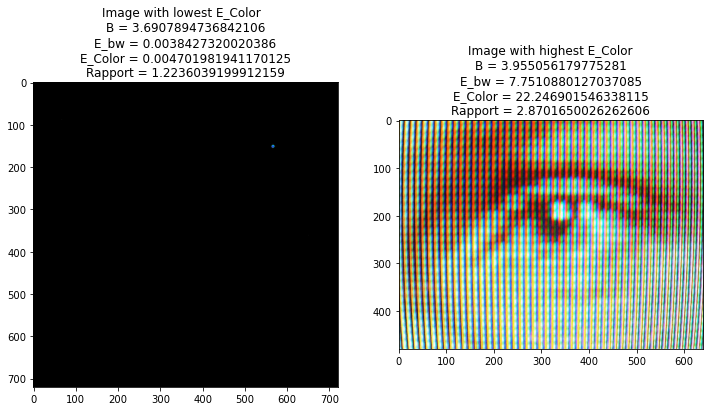

In [88]:
image_with_lowestEc = np.array(Image.open('images/695641.jpg'))#Charger l'image qui la plus basse Entropie Couleur
ilc_b = data4["B"][172298] #Récupérer sa note
ilc_bw_entropy = data4["Entropy_BW"][172298] #Récupérer son entropie Black & White
ilc_color_entropy = data4["Entropy_Color_NonR"][172298] #Récupérer son entropie Couleur
r1 = data4["E/E_bw"][172298] #Récupérer le rapport E/E_bw de cette image

#Ici on fait la même chose avec l'image qui l'entropie BW la plus haute
image_with_highestEc = np.array(Image.open('images/8067.jpg')) 
ihc_b = data4["B"][136976]
ihc_bw_entropy = data4["Entropy_BW"][136976]
ihc_color_entropy = data4["Entropy_Color_NonR"][136976]
r2 = data4["E/E_bw"][136976]

#Afficher les deux images avec leurs données
title1 = 'Image with lowest E_Color  \n'+'B = ' + str(ilc_b)+ '\n' + 'E_bw = '+str(ilc_bw_entropy)+'\n'+'E_Color = '+str(ilc_color_entropy) + '\n' + 'Rapport = ' + str(r1)
title2 = 'Image with highest E_Color\n'+'B = ' + str(ihc_b)+ '\n' +'E_bw = '+str(ihc_bw_entropy)+'\n'+'E_Color = '+str(ihc_color_entropy) + '\n' + 'Rapport = ' + str(r2)
niceDisplay14([image_with_lowestEc, image_with_highestEc],
              [title1, title2])

In [65]:
#Trier les rapports par ordre ascendant
data5 = data.sort_values(by=["E/E_bw"]).copy()
data5

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
113198,770850,0,0,6.128205,0.287296,1.458072,0.273154,0.398277
176188,16926,5,0,4.237113,0.599082,2.774662,0.299317,0.830504
26482,944350,18,21,5.876623,0.502052,2.251408,0.309136,0.695992
143405,458280,12,38,6.028571,0.346888,1.504100,0.319718,0.480889
143093,169971,7,15,5.310145,0.256754,1.070842,0.332390,0.355937
...,...,...,...,...,...,...,...,...
4875,311640,1,22,6.198980,15.903677,7.379060,2.987803,22.047178
27675,657094,1,51,4.669565,15.025072,6.969987,2.988409,20.829172
5286,816099,1,22,5.601449,15.480115,7.153529,2.999917,21.459996
59959,916098,0,0,5.521739,15.737089,7.213506,3.024360,21.816237


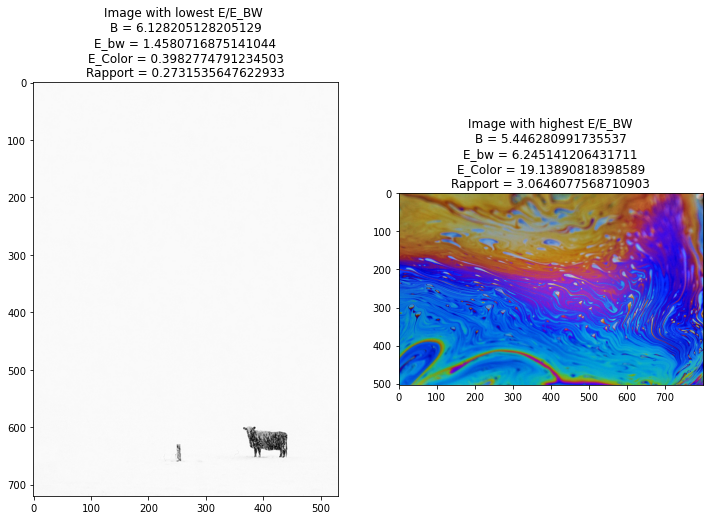

In [89]:
image_with_lowestR = np.array(Image.open('images/770850.jpg'))#Charger l'image qui le rapport le plus bas
ilr_b = data4["B"][113198] #Récupérer sa note
ilr_bw_entropy = data["Entropy_BW"][113198] #Récupérer son entropie Black & White
ilr_color_entropy = data["Entropy_Color_NonR"][113198] #Récupérer son entropie Couleur
r1 = data4["E/E_bw"][113198] #Récupérer le rapport E/E_bw de cette image

#Ici on fait la même chose avec l'image qui a le plus haut rapport
image_with_highestR = np.array(Image.open('images/912463.jpg')) 
ihr_b = data["B"][138293]
ihr_bw_entropy = data["Entropy_BW"][138293]
ihr_color_entropy = data["Entropy_Color_NonR"][138293]
r2 = data4["E/E_bw"][138293]

#Afficher les deux images avec leurs données
title1 = 'Image with lowest E/E_BW \n'+'B = ' + str(ilr_b)+ '\n' + 'E_bw = '+str(ilr_bw_entropy)+'\n'+'E_Color = '+str(ilr_color_entropy) + '\n' + 'Rapport = ' + str(r1)
title2 = 'Image with highest E/E_BW\n'+'B = ' + str(ihr_b)+ '\n' +'E_bw = '+str(ihr_bw_entropy)+'\n'+'E_Color = '+str(ihr_color_entropy) + '\n' + 'Rapport = ' + str(r2)
niceDisplay14([image_with_lowestR, image_with_highestR],
              [title1, title2])

In [178]:
data2 = data.sort_values(by=["B"], inplace = False)
data2 = data2.reset_index(drop=True)
data2

,ID,Tag1,Tag2,B,Entropy_Color,Entropy_BW,E/E_bw,Entropy_Color_NonR
0,7143,0,0,1.808989,2.879844,3.969770,1.005678,3.992311
1,221721,0,0,1.880519,11.116596,7.226441,2.132568,15.410874
2,309716,0,0,1.935484,10.013520,7.585779,1.829962,13.881687
3,8791,0,0,1.988764,3.424876,4.427804,1.072289,4.747886
4,212523,0,0,2.000000,9.967788,6.642144,2.080396,13.818288
...,...,...,...,...,...,...,...,...
249731,55938,13,18,8.388060,7.718247,6.726054,1.590793,10.699762
249732,491369,0,0,8.399254,11.186753,7.684606,2.018078,15.508133
249733,150,0,0,8.517442,10.623916,7.235449,2.035516,14.727875
249734,9482,28,29,8.571429,13.293221,7.340880,2.510369,18.428317


In [104]:
#Préparer les valeurs des notes et entropies pour faire des graphes
bw_entropies = np.array(data2["Entropy_BW"])

color_entropies =np.array(data2["Entropy_Color_NonR"])
rapports = np.array(data2["E/E_bw"])
ratings = np.array(data2["B"])

In [110]:
ratings

array([1.80898876, 1.88051948, 1.93548387, ..., 8.51744186, 8.57142857,
       8.6       ])

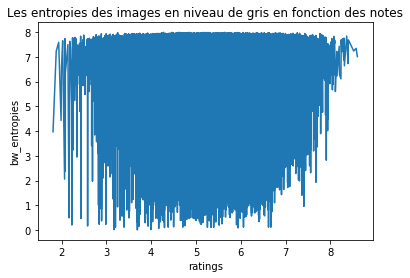

In [111]:
plt.plot(ratings, bw_entropies)
plt.title('Les entropies des images en niveau de gris en fonction des notes')
plt.xlabel('ratings')
plt.ylabel('bw_entropies')
plt.show()

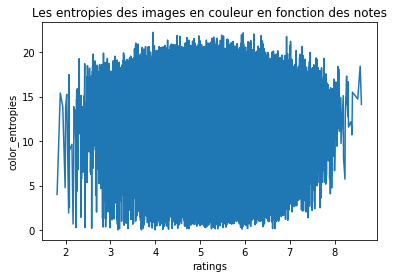

array([ 3.99231115, 15.41087393, 13.88168684, ..., 14.72787459,
       18.42831722, 14.12973273])

In [135]:
plt.plot(ratings, color_entropies)
plt.title('Les entropies des images en couleur en fonction des notes')
plt.xlabel('ratings')
plt.ylabel('color_entropies')
plt.show()
color_entropies

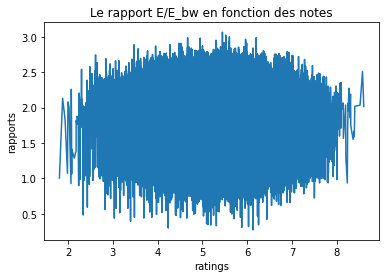

In [113]:
plt.plot(ratings, rapports)
plt.title('Le rapport E/E_bw en fonction des notes')
plt.xlabel('ratings')
plt.ylabel('rapports')
plt.show()

**Les graphes ci-dessus ne nous donnent pas assez d'informations, essayons avec d'autres approches!**

###### Ici nous allons rétrécir la taille de notre data. Pour faire cela nous allons, pour chaque note, calculer la moyenne des entropies/rapports des images correspondantes à cette note.

In [158]:
rounded_ratings_alpha = np.around(ratings,1)

rounded_ratings, r_counts = np.unique(rounded_ratings_alpha, return_counts = True)


r_bw_entropies = np.around(bw_entropies,2)
r_color_entropies = np.around(color_entropies,2)
r_rapports = np.around(rapports,2)


(249736,)

In [164]:
means_E = np.zeros(len(rounded_ratings))
means_EBW = np.zeros(len(rounded_ratings))
means_rapports = np.zeros(len(rounded_ratings))
x = 0
for r in rounded_ratings:
    indices = np.where(rounded_ratings_alpha == r)
    s = 0
    s1 = 0
    s2 = 0
    for i in indices:
        s = s + r_color_entropies[i]
        s1 += r_bw_entropies[i]
        s2 += r_rapports[i]
    
    mean = s.mean()
    print(mean)
    means_E[x] = mean
    
    mean = s1.mean()
    means_EBW[x] = mean
    
    mean = s2.mean()
    means_rapports[x] = mean
    x = x+1
 
#means_E = np.array(means_E)
#print(means_E.shape)
#means_E = means_E.flatten()
#print(means_E.shape)

#means_EBW = np.array(means_EBW)
#print(means_EBW.shape)
#means_EBW = means_EBW.flatten()
#print(means_EBW.shape)

#means_rapports = np.array(means_rapports)
#print(means_rapports.shape)
#means_rapports = means_rapports.flatten()
#print(means_rapports.shape)

3.99
14.645
11.280000000000001
8.873333333333333
10.068666666666667
13.130416666666667
11.635769230769231
12.903157894736841
13.265
13.223258426966288
12.645876288659792
12.751509433962266
12.528239436619717
13.276939890710384
12.752922535211267
12.827551622418882
12.951065375302663
13.14259567387687
12.708296089385474
13.04282183316169
13.035785191212367
13.120585009140768
13.107278450363195
13.04479631053036
12.953148094268256
13.04274856715674
12.996012805587892
13.095661005661007
13.082835572794014
12.988622400756144
12.952411375926296
12.921902465653718
12.910563968240977
12.78343370229894
12.737971445136974
12.729097376931371
12.63527890286364
12.585076396973223
12.562559994037859
12.514334893313238
12.50416927369578
12.472525395033859
12.42203443877551
12.331375416072278
12.409368938669582
12.35381080626157
12.414514150009893
12.388356626506026
12.296031649421789
12.467173996175909
12.327545499262175
12.554167717528372
12.280659811482433
12.488523573200993
12.493102893890676
12.

##### Réessayons avec les graphes mais maintenant on va prendre les notes dans l'axe des X et les moyennes des entropies / rapports dans l'axe des Y

# 2D PLOTS et HISTOGRAMMES

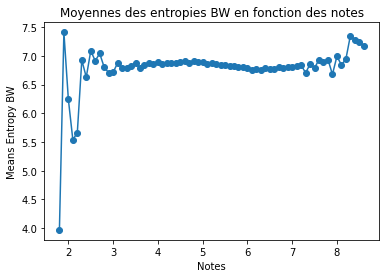

In [165]:

plt.plot(rounded_ratings, means_EBW, '-o')
plt.title('Moyennes des entropies BW en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Entropy BW')
plt.show()

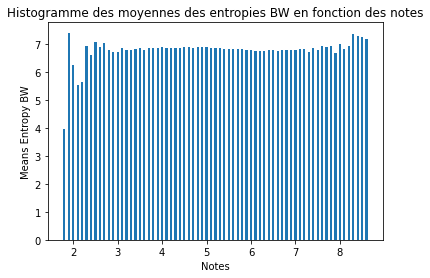

In [166]:
plt.bar(rounded_ratings, means_EBW, width = 0.05)
plt.title('Histogramme des moyennes des entropies BW en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Entropy BW')
plt.show()

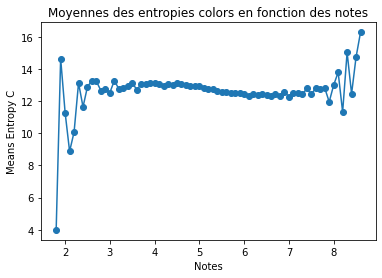

In [167]:
plt.plot(rounded_ratings, means_E, '-o')
plt.title('Moyennes des entropies colors en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Entropy C')
plt.show()

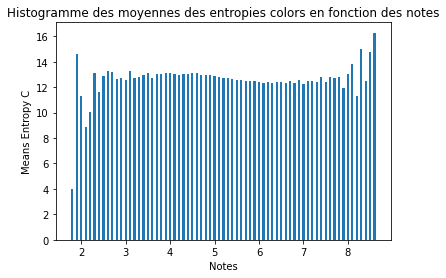

In [168]:
plt.bar(rounded_ratings, means_E, width = 0.05)
plt.title('Histogramme des moyennes des entropies colors en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Entropy C')
plt.show()

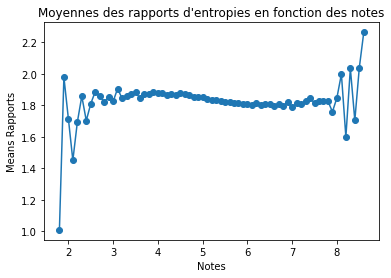

In [169]:
plt.plot(rounded_ratings, means_rapports, '-o')
plt.title('Moyennes des rapports d\'entropies en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Rapports')
plt.show()

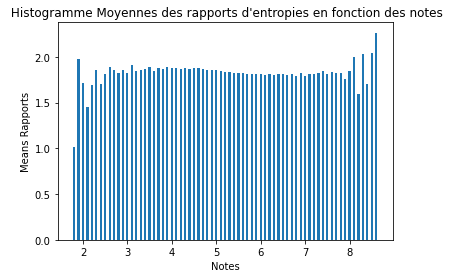

In [170]:
plt.bar(rounded_ratings, means_rapports, width = 0.05)
plt.title(' Histogramme Moyennes des rapports d\'entropies en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Means Rapports')
plt.show()

###### D'après les graphes et histogrammes calculés, on peut déjà remarquer qu'il n'y a pas vraiment une relation linéaire entre les notes et les moyennes des entropies/rapports.

###### Mais on ne peut pas se contenter des résultats parce que nous n'avons pas tenu en compte la distribution des notes.

###### Essayons cette fois avec des graphes..3D :

# 3D PLOTS

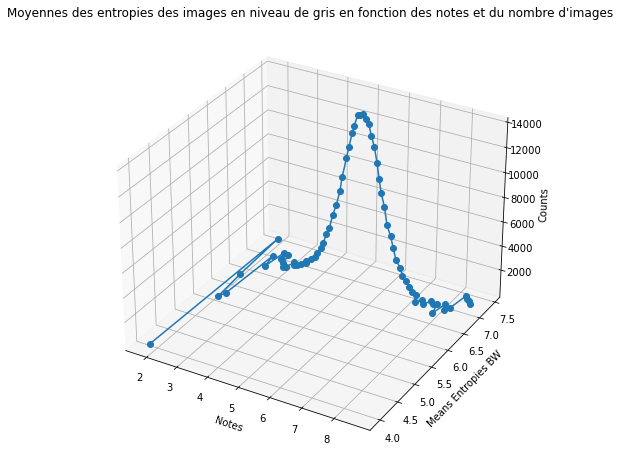

In [171]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.gca(projection='3d')
ax.set_xlabel('Notes')
ax.set_ylabel('Means Entropies BW')
ax.set_zlabel('Counts')
ax.set_title('Moyennes des entropies des images en niveau de gris en fonction des notes et du nombre d\'images')
ax.plot(rounded_ratings, means_EBW, r_counts, '-o')
plt.show()

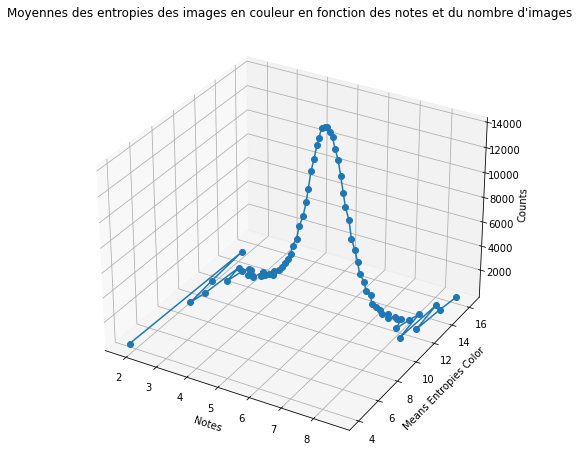

In [172]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.gca(projection='3d')
ax.plot(rounded_ratings, means_E, r_counts, '-o')
ax.set_xlabel('Notes')
ax.set_ylabel('Means Entropies Color')
ax.set_zlabel('Counts')
ax.set_title('Moyennes des entropies des images en couleur en fonction des notes et du nombre d\'images')
plt.show()

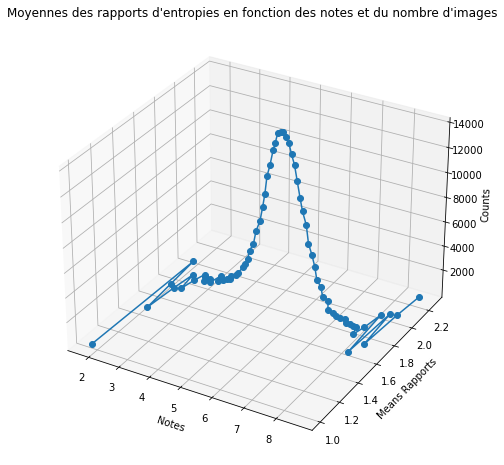

In [173]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.gca(projection='3d')
ax.plot(rounded_ratings, means_rapports, r_counts, '-o')
ax.set_xlabel('Notes')
ax.set_ylabel('Means Rapports')
ax.set_zlabel('Counts')
ax.set_title('Moyennes des rapports d\'entropies en fonction des notes et du nombre d\'images')
plt.show()

###### Le comportement des entropies et rapports n'a pas vraiment changé quand on a tenu en compte la distribution des notes, toujours un comportement aléatoire.

###### Nous allons tenter maintenant de créer une sorte "d'images" avec des les données réelles ( et non les moyennes ) en utilisant les scatter plots pour voir si on peut obtenir d'autres informations.

# SCATTER PLOTS

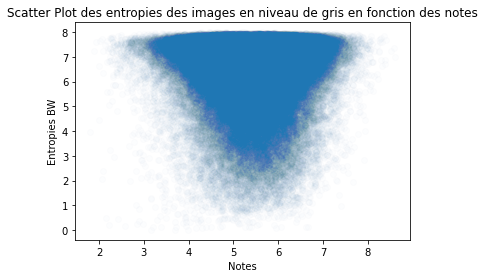

In [174]:
plt.scatter(ratings, bw_entropies, alpha = 0.01)
plt.title('Scatter Plot des entropies des images en niveau de gris en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Entropies BW')
plt.show()

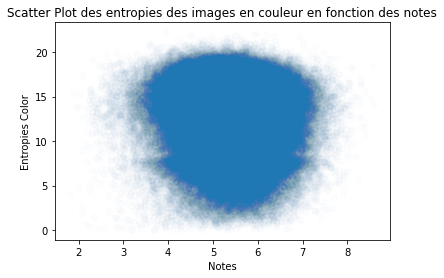

In [175]:
plt.scatter(ratings, color_entropies, alpha = 0.01)
plt.title('Scatter Plot des entropies des images en couleur en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Entropies Color')
plt.show()

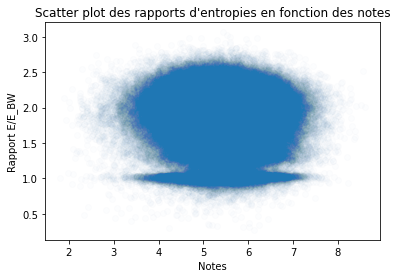

In [176]:
plt.scatter(ratings, rapports, alpha = 0.01)
plt.title('Scatter plot des rapports d\'entropies en fonction des notes')
plt.xlabel('Notes')
plt.ylabel('Rapport E/E_BW')
plt.show()

###### Hmm, toujours un comportement aléatoire, on peut expliquer la densité aux centres des 3 scatters plot par le nombre des images qui ont les note qui se trouvent au milieu de notre intervalle. Mais cela ne nous dit toujours pas si on a bien une relation entre les entropies des images et leurs notes.

###### Et si les valeurs d'entropies/rapports sont indépendantes des notes des images? 

###### Testons ça avec un test Chi2! On prend H0 : Les deux variables sont indépendantes. avec un niveau de confiance de 95%

# TEST CHI-SQUARE

In [33]:
chi2_ratings = np.around(ratings,1)
chi2_bw_entropies = np.around(bw_entropies,2)
chi2_color_entropies = np.around(color_entropies,2)
chi2_rapports = np.around(rapports,2)


In [34]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2_f, p, dof, _ = chi2_contingency([chi2_ratings, chi2_bw_entropies])
print("p is ", p)
print('Degree of Freedom dof=%d' % dof)
print('Chi2 = %d' % chi2_f)
confiance = 0.95
critical = chi2.ppf(confiance, dof)
print('confiance=%.2f, critical=%.3f, Chi2=%.3f' % (confiance, critical, chi2_f))
if abs(chi2_f) >= critical:
    print('Les variables sont dépendantes, on rejette H0')
else:
    print('Les variables sont indépendantes, on ne rejette pas H0')


p is  1.0
Degree of Freedom dof=249735
Chi2 = 40571
confiance=0.95, critical=250898.606, Chi2=40571.327
Les variables sont indépendantes, on ne rejette pas H0


###### D'après le test Chi2 sur les données, il y a bien une indépendance entre les variables notes et Entropy BW. 

In [35]:
chi2_f, p, dof, _ = chi2_contingency([chi2_ratings, chi2_color_entropies])
print("p is ", p)
print('Degree of Freedom dof=%d' % dof)
print('Chi2 = %d' % chi2_f)
confiance = 0.95
critical = chi2.ppf(confiance, dof)
print('confiance=%.2f, critical=%.3f, Chi2=%.3f' % (confiance, critical, chi2_f))
if abs(chi2_f) >= critical:
    print('Les variables sont dépendantes, on rejette H0')
else:
    print('Les variables sont indépendantes, on ne rejette pas H0')

p is  1.0
Degree of Freedom dof=249735
Chi2 = 127890
confiance=0.95, critical=250898.606, Chi2=127890.196
Les variables sont indépendantes, on ne rejette pas H0


###### Même chose pour les variables notes et Entropy Color

In [36]:
chi2_f, p, dof, _ = chi2_contingency([chi2_ratings, chi2_rapports])
print("p is ", p)
print('Degree of Freedom dof=%d' % dof)
print('Chi2 = %d' % chi2_f)
confiance = 0.95
critical = chi2.ppf(confiance, dof)
print('confiance=%.2f, critical=%.3f, Chi2=%.3f' % (confiance, critical, chi2_f))
if abs(chi2_f) >= critical:
    print('Les variables sont dépendantes, on rejette H0')
else:
    print('Les variables sont indépendantes, on ne rejette pas H0')

p is  1.0
Degree of Freedom dof=249735
Chi2 = 24176
confiance=0.95, critical=250898.606, Chi2=24176.001
Les variables sont indépendantes, on ne rejette pas H0


###### Et naturellement aussi entre les notes et rapports.

## Proba B, Entropy

In [131]:
df = data2[data2["B"]<3.85].copy()
df2 = df[3.75<=df["B"]].copy()
df2

np.mean(np.array(df2["Entropy_Color"]))

9.399614198823661

In [132]:
np.mean(np.array(df2["E/E_bw"]))

1.8711334701096245

In [133]:
np.mean(np.array(df2["Entropy_BW"]))

6.865070384145983

In [177]:
## Proba B, Entropy
rounded_ratings_alpha = np.around(ratings,1)
r_bw_entropies = np.around(bw_entropies,2)
r_color_entropies = np.around(color_entropies,2)
r_rapports = np.around(rapports,2)

In [193]:
test2 = np.stack((rounded_ratings_alpha, r_bw_entropies),axis = 1)
print(list(test2)[0])

[1.8  3.97]


In [200]:
test2l = list(test2)
counts = []
for l in test2l:
    counts.append(test2l.count(l))
    
    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [191]:
h = np.zeros(test2.shape[0])
for i in range(test2.shape[0]):
    x = test2[i] # x est un pixel qui a trois valeurs R G B
    h[x[0],x[1]] += 1 #on va incrémenter le nombre des valeurs R G B sur l'histogramme3D
            
    hn = h/h.sum() # On normalise l'histogramme

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices